<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C__142_to181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01 합성곱 신경망**
**합성곱 신경망(CNN: Convolutional Neural Netword)**
- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
- 이미지 분류(Image Classification), 객체 탐지(Object Detection), 스타일 전이(Style Transfer) 등 컴퓨터 비전 분야에서 많이 사용됨
  - **이미지 분류**: 강아지 또는 고양이 사진으로 모델을 학습시키면 이미지 특징을 추출해 고양이 또는 강아지로 분류
  - **객체 탐지**: 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악
    - 경계 박스 (bounding box): 고양이 이미지의 위치에 표시된 노란색 실선
    - 객체 위치는 이미지의 좌표값으로 찾기 때문에 경계 박스를 찾는 문제는 회귀분석으로 해결
  - 스타일 전이: 콘텐츠 이미지와 스타일 참고 이미지를 통해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지 생성

###**1-1 이미지 표현**
이미지 또는 영상을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함
- 흑백: 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타냄, 0: 검은 색, 1: 흰색
- 컬러: R, G, B 채널로 구성된 3장의 이미지를 겹쳐서 표현

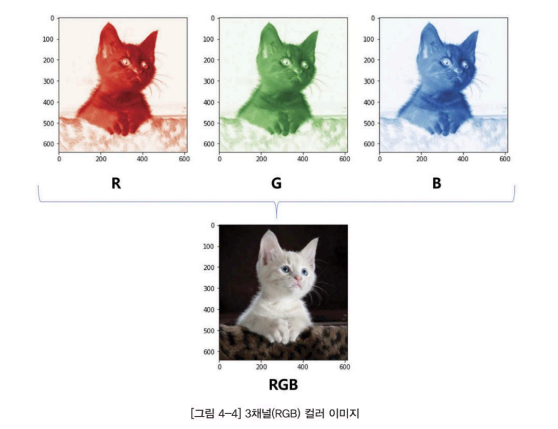

###**1-2 합성곱(Convolution)**
**합성곱 연산**
- 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
- 합성곱 연산을 통해 추출된 이미지 = 특성맵(feature map)
  - 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임
  

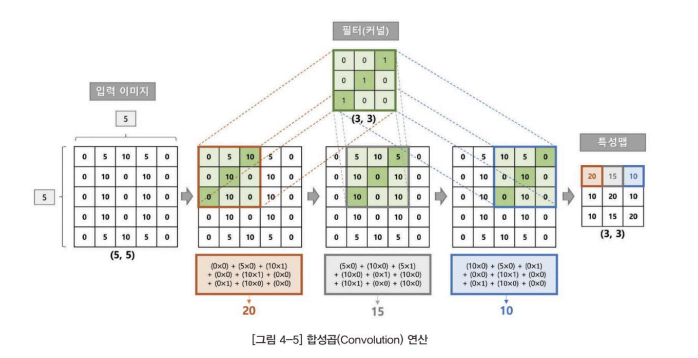

합성곱 연산
1. 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력
2. 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영
3. 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행
- 커널 사이즈가 3X3인 경우 총 9개의 가중치를 가지며 오차 역전파(back propagation)시 커널의 가중치를 업데이트
  - 공유 가중치(shared weights)때문에 이미지 특성 추출에 효율적임
  

###**1-3 채널(channel)**
**채널**
- 입력 이미지를 구성하는 2차원 배열의 개수
  - 흑백 이미지: 단일 채널, 컬러 이미지: R, G, B, 3개의 채널

<br>

컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우 합성곱 연산을 수행할 때 특성 맵의 생성 과정을 잘 살펴보아야 함
1. 입력 이미지의 채널 개수만큼 커널 생성
2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
3. 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성
4. element-wise 덧셈 연산으로 모두 더해줌

<br>

- 합성곱 레이어에 출력 필터 개수를 20개로 설정-> 입력 이미지의 채널 개수 3개와 출력 필터 개수의 20개가 곱해져서 총 60개의 커널 생성
- **업데이트할 가중치의 그래디언트 개수**: 1개의 커널 사이즈가 3X3-> 3X3X입력 채널 수X출력 필터 수 + bias(출력 필터 개수만큼 추가)

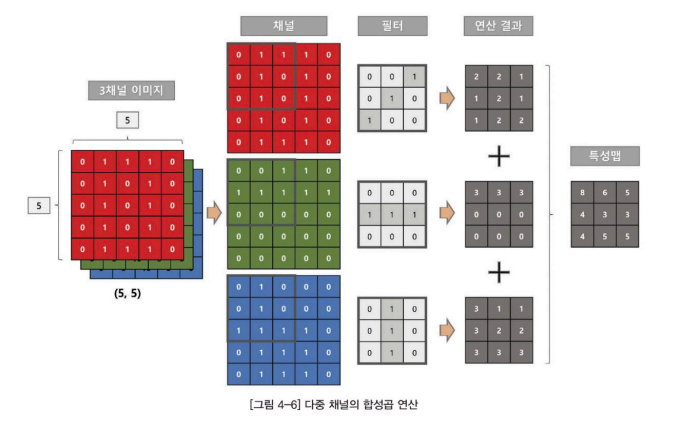

###**1-4 스트라이드(stride)**
**스트라이드**
- 커널이 우측으로 이동하면서 합성곱 연산을 하면서 이동하는 간격
- 텐서플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드를 지정할 수 있음

<br>

###**1-5 패딩(padding)**
- 커널 크기 3X3, 스트라이드에서 1로 설정하게 되면 특성맵의 사이즈는 입력 크기 대비 가로 세로 각 2픽셀씩 줄어들게 됨
- 패딩(padding)을 설정하면서 입력 이미지 사이즈=특성맵 사이즈
  - **zero-padding**: 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출
- 텐서플로 케라스의 Covn2D 레이어에서 padding='same'으로 설정하면 zero-padding 적용

<br>

###**1-6 특성맵(feature map) 사이즈**
패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식


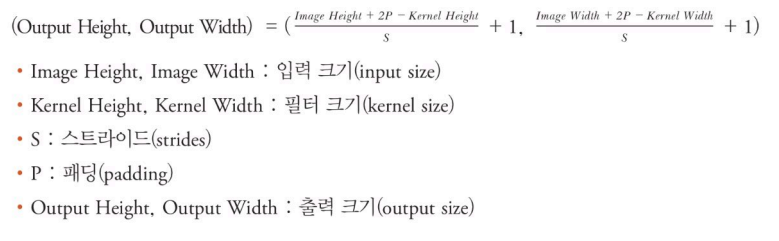

### **1-7 풀링(pooling)**
**풀링 레이어**
- 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 이점: 1. 이미지 축소를 통해 연산량 감소 2. 과대적합을 방지
1. **최대 풀링(max pooling)**: 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념
  - 커널 크기가 2X2일 때 -> 입력 이미지의 2X2 픽셀 중 최대값이 출력 값
2. 평균 풀링(average pooling)
  - 2X2 픽셀들의 평균 값이 출력 값
- 풀링 레이어도 스트라이드 값을 가짐


##**02 간단한 모델 생성**
###**2-1 데이터 로드 전처리**


In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


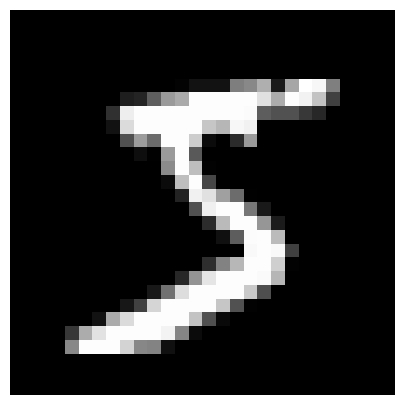

In [3]:
import matplotlib.pylab as plt

def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train,0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
#정규화 Normalization
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지
- CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가
  - 다음 코드는 tf.newaxis 축을 ㅌ네서 배열에 직접 추가하는방식

In [6]:
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###**2-2 Sequential API로 모델 생성 및 학습**
- 합성곱 레이어 1개, 풀링 레이어 1개 적용
- 최종 분류기로 Dense 레이어를 적용하기 위해 Flatten 층을 추가
- 합성곱은 Conv2D 레이어 사용
- (3,3) 크기의 서로 다른 32가지 종류의 커널을 적용
- ReLU 활성화 함수 적용
- name 속성 레이어 이름을 conv
- 풀링 레이어는 (2,2) 크기로 최대 풀링 (max pooling) 적용
- 최종 분류기는 정답 레이블이 0~9까지 10개의 값이므로 노드 개수는 10개, 다중 분류 문제이므로 활성화함수는 softmax

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid),
                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2227 - accuracy: 0.9368 - val_loss: 0.0935 - val_accuracy: 0.9727
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0840 - accuracy: 0.9751 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0638 - accuracy: 0.9814 - val_loss: 0.0579 - val_accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0553 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0589 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0582 -

- evaluate(): 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 4s 11ms/step - loss: 0.0548 - accuracy: 0.9846


[0.054801348596811295, 0.9846000075340271]

훈련 결과를 history 객체에 저장한 것을 이용하여 10epoch 동안 모델의 예측 오차와 정확도를 그리는 함수 정의 및 실행

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1,2, figsize=(12,4))

  axes[0].plot(range(1,epoch+1), loss, label='Training')
  axes[0].plot(range(1,epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1,epoch+1), acc, label='Training')
  axes[1].plot(range(1,epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

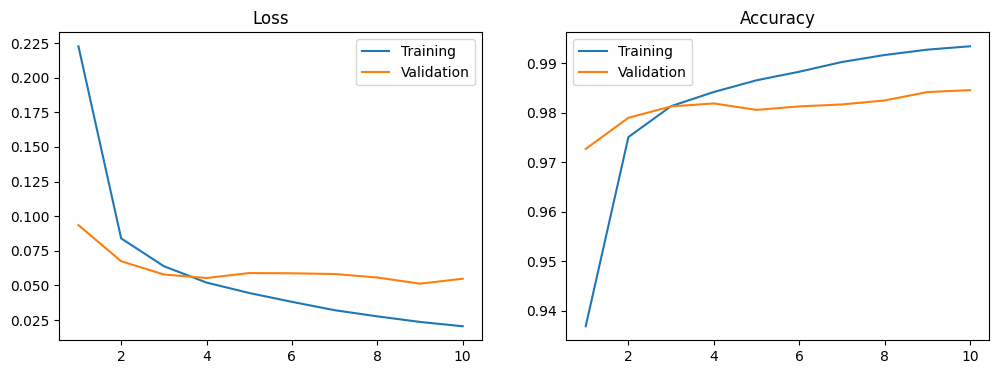

In [11]:
plot_loss_acc(history, 10)

###**2-3 모델 구조 파악**

모델 인스턴스에 summary() 메소드 적용 -> 모델의 구조를 요약
- 각 레이어의 이름
- 출력 텐서의 형태
- 각 레이어를 구성하는 파라미터(가중치) 개수

<br>

- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환
  - 특성맵이 32개 생성 -> 32개의 커널을 적용해서 32가지 종류의 피처를 추출
- (2,2) 크기의 풀링 레이어 적용 -> 이미지 크기가 1/2로 줄어든다

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


입력 텐서는 (None, 28, 28, 1) 형태인데, 가장 앞에 있는 축(axis=0)의 None 값은 배치 크기가 들어오는 위치로서 배치 크기가 **어떤 값이든 가능**하다는 의미

In [13]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

출력 텐서: output 속성, 10개의 노드를 갖는 1차원 벡터 형태

In [14]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
model.layers

In [16]:
model.layers[0]

각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능

In [17]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

가중치 행렬 추출
- weights 속성을 각 레이어 인스턴스에 적용
- 첫 번째 변수는 'conv/kernel:0': 커널(합성곱 필터) 행렬의 가중치
- 두 번째 변수는 'conv/bias:0': 커널의 상수항(bias)

In [19]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.92249583e-02, -7.27438450e-01, -6.90416455e-01,
            3.98933917e-01, -1.03524335e-01, -2.86743641e-01,
           -8.20249200e-01, -5.55413842e-01,  2.76737481e-01,
            9.08952877e-02, -2.42056817e-01, -3.61461252e-01,
            2.11644843e-01,  3.31595093e-01, -1.27252781e+00,
            3.97465587e-01, -4.79442686e-01,  2.36899793e-01,
            1.24483161e-01, -8.47353458e-01, -3.65509897e-01,
           -7.19350576e-01,  2.94415057e-01,  2.09197089e-01,
            4.08732474e-01, -4.87649590e-01, -2.77986079e-01,
           -3.53656635e-02,  3.61552685e-01, -5.64077914e-01,
            3.06078076e-01,  4.91782486e-01]],
 
         [[ 1.77737758e-01, -6.19647741e-01,  4.19131257e-02,
           -6.64898977e-02, -7.51167893e-01,  1.10505022e-01,
           -6.80695355e-01,  6.28526583e-02,  8.74935240e-02,
            9.37689543e-02, -8.27608407e-02,  1.49089471e-01,
           

커널 가중치의 shape (3, 3, 1, 32): 
- (3, 3)은 필터의 크기
- (1)은 입력층의 채널 개수
- layer[0] 커널의 학습(업데이트) 가능한 파라미터의 수는 3X3X1X32=288개
상수항(bias) 가중치의 shape은 (32,) : 출력층의 채널 수
- 총 학습 가능한 파라미터 수는 288 + 32 = 320개

In [20]:
#첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 2.92249583e-02, -7.27438450e-01, -6.90416455e-01,
           3.98933917e-01, -1.03524335e-01, -2.86743641e-01,
          -8.20249200e-01, -5.55413842e-01,  2.76737481e-01,
           9.08952877e-02, -2.42056817e-01, -3.61461252e-01,
           2.11644843e-01,  3.31595093e-01, -1.27252781e+00,
           3.97465587e-01, -4.79442686e-01,  2.36899793e-01,
           1.24483161e-01, -8.47353458e-01, -3.65509897e-01,
          -7.19350576e-01,  2.94415057e-01,  2.09197089e-01,
           4.08732474e-01, -4.87649590e-01, -2.77986079e-01,
          -3.53656635e-02,  3.61552685e-01, -5.64077914e-01,
           3.06078076e-01,  4.91782486e-01]],

        [[ 1.77737758e-01, -6.19647741e-01,  4.19131257e-02,
          -6.64898977e-02, -7.51167893e-01,  1.10505022e-01,
          -6.80695355e-01,  6.28526583e-02,  8.74935240e-02,
           9.37689543e-02, -8.27608407e-02,  1.49089471e-01,
          -3.51715416e-01,  

In [21]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.16838527, -0.01517082, -0.08206198, -0.39425245, -0.023671  ,
       -0.35355654, -0.02207768, -0.2807496 ,  0.02203452, -0.31287113,
       -0.11758795, -0.27386788, -0.26150978, -0.45750195,  0.20267528,
       -0.02235417, -0.00785364, -0.19909373, -0.2966869 , -0.12001734,
       -0.07166258, -0.00938381, -0.35687068, -0.27648762, -0.44550693,
       -0.1729021 , -0.09495888, -0.06268954, -0.2998329 , -0.27502778,
       -0.26516044, -0.01898143], dtype=float32)>

레이어의 이름(name 속성)을 사용하여 해당 레이어 선택 가능
- 모델을 정의할 때 Conv2D 합성곱 레이어의 이름을 'conv'라고 지정해두었으므로 다음과 같이 추출이 가능

In [22]:
model.get_layer('conv')

In [23]:
model.layers[0]

모델에 입력 데이터를 넣어주고, 모델의 첫번째와 두번째 레이어의 출력을 최종 출력으로 갖는 activator 모델을 정의

In [24]:
activator=tf.keras.Model(inputs=model.input,
                         outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

1/1 [==============================] - 0s 283ms/step


2

첫 번째 텐서는 Conv2D 레이어의 출력
- 텐서의 형태는 (1, 26, 26, 32) : 1은 입력 이미지의 개수를 나타냄

In [25]:
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

특성맵 이미지를 32개 커널별로 구분하여 시각화
- 출력 이미지의 특징이 조금씩 차이가 있는 것을 볼 수 있음
- 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할

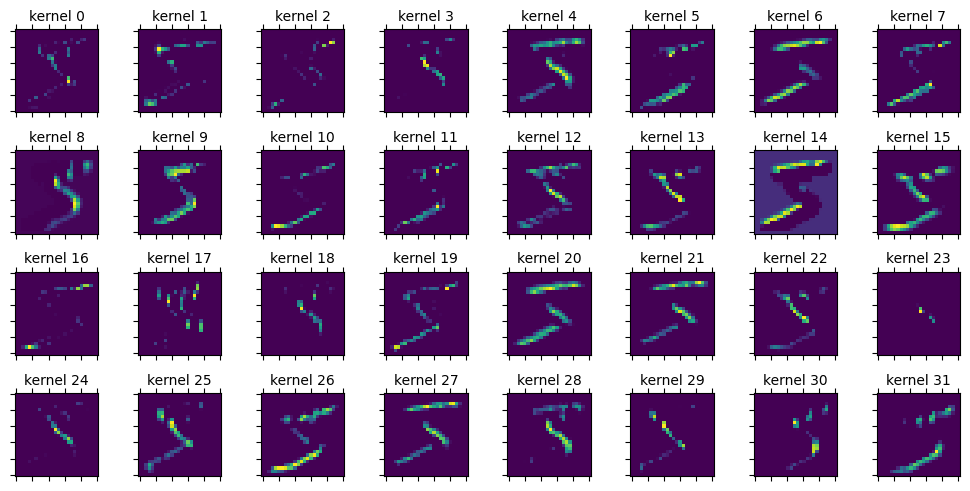

In [26]:
fig, axes=plt.subplots(4,8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

두 번째 레이어는 최대 풀링 레이어
- (1, 13, 13, 32)

In [27]:
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


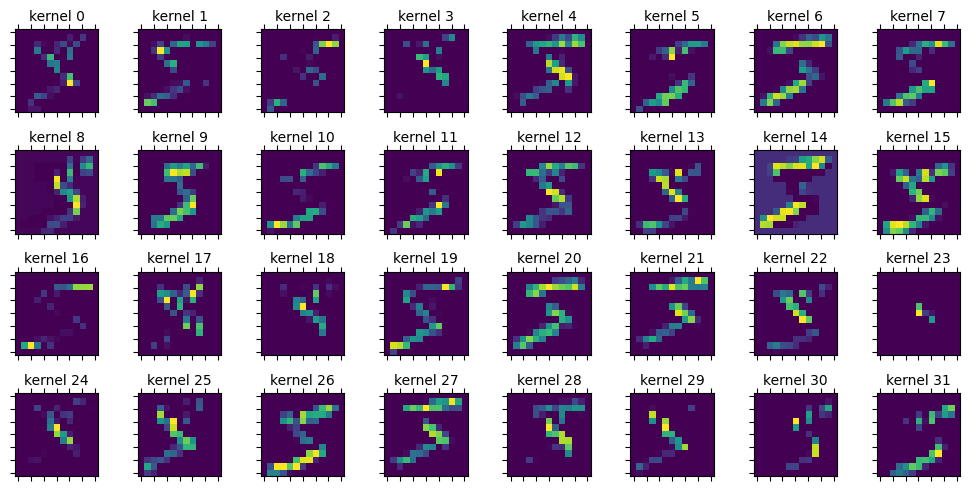

In [28]:
fig, axes=plt.subplots(4,8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

##**03 복잡한 모델 생성**
Functional API: 복잡한 구조의 모델 정의 가능
- 입력이 2개 이상이거나 출력이 2개 이상인 모델 구현 가능
- 중간에 있는 레이어는 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식으로 직접 연결 가능

<br>

###**3-1 데이터셋 준비**

In [29]:
import tensorflow as tf
import numpy as np

In [30]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지 판단하는 정답(y_odd)을 새로 만들어 추가
- 홀수:1, 짝수:0

In [31]:
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


검증 데이터셋에도 동일하게 odd 배열 생성

In [33]:
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 255로 나눠서 정규화
- 색상이 하나인 모노 컬러 이미지 -> 새로운 축을 추가하고 채널 개수를 1로 지정
  - 텐서플로 expand_dims() 함수에 원본 배열을 입력하고 새롭게 추가하려는 축의 인덱스를 지정하면 새로운 축 추가
  - 축의 인덱스: -1 --> 끝에 추가

In [34]:
x_train=x_train/255.0
x_valid=x_valid/255.0

x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###**3-2 Functional API로 다중 입력, 다중 출력 레이어 생성**
입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용
- 입력 레이어는 2개의 출력을 갖게 됨
- 서로 다른 2개의 출력은 각각 다른 레이어의 입력에 사용
- 최종적으로 Concatenate 레이어에서 합쳐져 Dense 레이어를 통과

In [35]:
inputs=tf.keras.layers.Input(shape=(28,28,1))

conv=tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

모델 구조 그래프로 출력: 케라스 utils 모듈의 plot_model

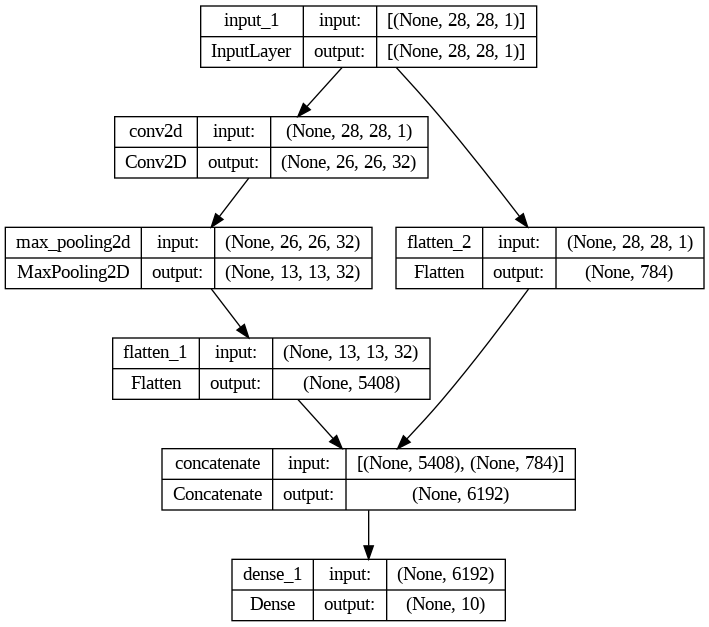

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

- 옵티마이저: adam


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train_in, y_train,
                  validation_data=(x_valid_in, y_valid),
                  epochs=10)

val_loss,val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1984 - accuracy: 0.9428 - val_loss: 0.0876 - val_accuracy: 0.9730
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0755 - accuracy: 0.9785 - val_loss: 0.0685 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0583 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0640 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0558 -

###**3-3 다중 출력 분류 모델**
1. 숫자를 맞추는 분류 문제
2. 홀수, 짝수를 맞추는 분류 문제
동시에 풀어내는 모델을 정의
- 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심

In [38]:
inputs=tf.keras.layers.Input(shape=(28,28,1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3,3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [39]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


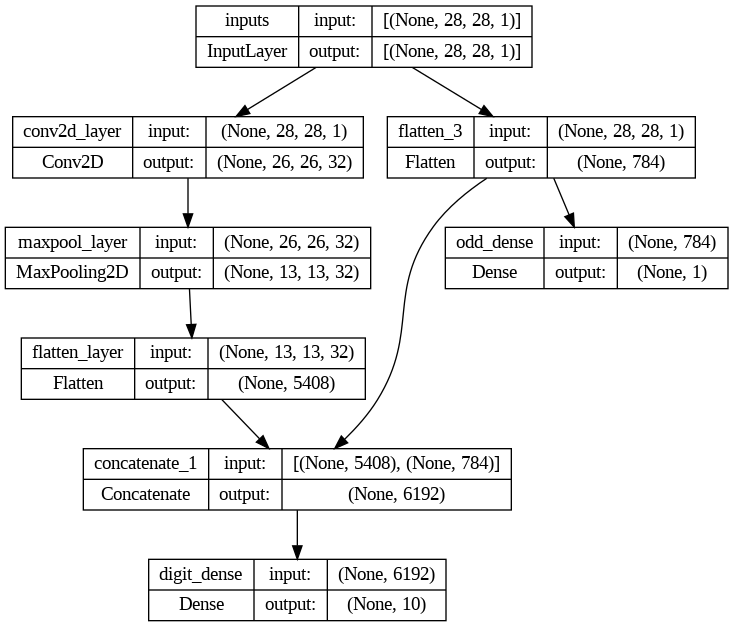

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True)

**컴파일할 때 주의사항**
- 각각의 출력 Dense 레이어에 name 속성으로 지정한 이름을 key로 하고 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치의 딕셔너리 형태로 지정
-  fit 메소드를 적용할 때도 출력 값을 2개 지정하고 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출려겡 맞는 정답을 배열

In [41]:
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              metrics=['accuracy'])

history=model.fit({'inputs':x_train_in}, {'digit_dense': y_train, 'odd_dense':y_train_odd}, validation_data=({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3684 - digit_dense_loss: 0.2076 - odd_dense_loss: 0.3217 - digit_dense_accuracy: 0.9409 - odd_dense_accuracy: 0.8667 - val_loss: 0.2272 - val_digit_dense_loss: 0.0896 - val_odd_dense_loss: 0.2752 - val_digit_dense_accuracy: 0.9737 - val_odd_dense_accuracy: 0.8886
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2189 - digit_dense_loss: 0.0832 - odd_dense_loss: 0.2713 - digit_dense_accuracy: 0.9758 - odd_dense_accuracy: 0.8915 - val_loss: 0.1983 - val_digit_dense_loss: 0.0665 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9793 - val_odd_dense_accuracy: 0.8970
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1931 - digit_dense_loss: 0.0617 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9819 - odd_dense_accuracy: 0.8959 - val_loss: 0.1967 - val_digit_dense_loss: 0.0671 - val_odd_dense_loss: 0.2592 - val_digit_dense_accuracy: 0.9777 -

In [42]:
#모델 성능 평가
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 10ms/step - loss: 0.1906 - digit_dense_loss: 0.0631 - odd_dense_loss: 0.2550 - digit_dense_accuracy: 0.9833 - odd_dense_accuracy: 0.9001


[0.19059644639492035,
 0.06307296454906464,
 0.25504693388938904,
 0.983299970626831,
 0.9000999927520752]

검증 데이터 셋의 인덱스 0에 해당하는 이미지로 확인

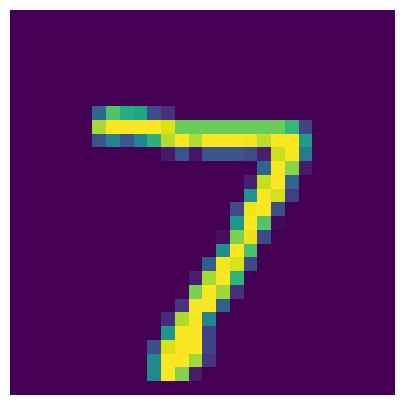

In [43]:
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

2개의 분류 문제에 대한 예측 확률
1. 10개 분류 레이블에 대한 확률
2. 홀수일 확률

In [44]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 10ms/step
[2.5068541e-12 2.7340225e-10 9.4589065e-09 2.3628014e-07 2.5056591e-12
 1.6114041e-11 8.9103581e-21 9.9999970e-01 4.2761839e-09 2.2057224e-08]
[0.99946654]


- argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환

In [45]:
digit_labels=np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

홀수일 확률이 0.5보다 큰 경우 홀수로 분류

In [46]:
odd_labels=(odd_preds <0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-46-aaef6504caec>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds <0.5).astype(np.int).reshape(1,-1)[0]


array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

###**3-4 전이 학습(transfer Learning)**
- 최종 출력층만 새롭게 추가하여 모델을 재구성할 수 있음
- Transfer Learning: 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

<br>

앞에서 학습한 입력 레이어부터 flatten_layer 라는 name 속성을 갖는 Flatten 층까지 해당하는 부분을 따로 추출하여 base_model 객체로 만든다.

In [47]:
base_model_output=model.get_layer('flatten_layer').output

base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


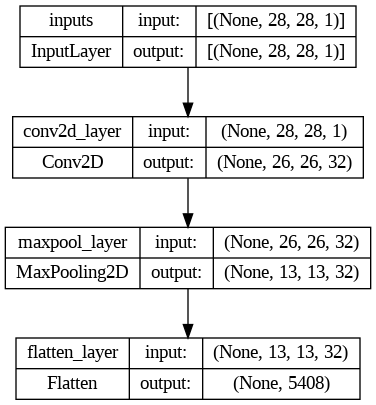

In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True)

1. Sequential API를 사용하여 앞에서 정의한 base_model을 레이어로 추가
2. 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가

In [50]:
digit_model=tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


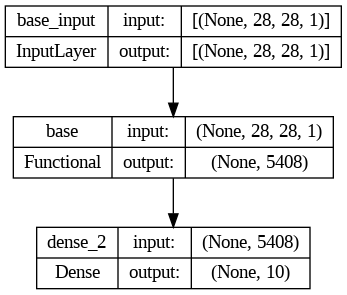

In [52]:
plot_model(digit_model, show_shapes=True, show_layer_names=True)

컴파일 및 훈련

In [53]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=digit_model.fit(x_train_in, y_train, 
                        validation_data=(x_valid_in, y_valid),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1296 - accuracy: 0.9632 - val_loss: 0.0675 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0598 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0511 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0544 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0524 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0677 -

모델 인스턴스의 trainable 속성: False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트되지 않음
- 이런 방식으로 base_model_frozen을 구성

In [54]:
base_model_frozen=tf.keras.models.Model(inputs=model.input, 
                                        outputs=base_model_output,
                                        name='base_frozen')

base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API에 적용하여 구성
- 훈련 가능한 파라미터에 Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않음

In [55]:
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input,
                                         outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [57]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

history=digit_model_frozen.fit(x_train_in,y_train,
                               validation_data=(x_valid_in, y_valid),
                               epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1158 - accuracy: 0.9695 - val_loss: 0.0626 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0498 - accuracy: 0.9856 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0558 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0506 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0541 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0524 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0535 -

In [58]:
# 베이스 모델의 Conv2D 레이어 가중치만 고정
base_model_frozen2=tf.keras.models.Model(inputs=model.input,
                                        outputs=base_model_output,
                                        name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [59]:
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input,
                                          outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [60]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

history=digit_model_frozen2.fit(x_train_in,y_train,
                               validation_data=(x_valid_in, y_valid),
                               epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1167 - accuracy: 0.9688 - val_loss: 0.0586 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 0.0581 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0524 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0507 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0538 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0608 -